<a href="https://colab.research.google.com/github/mshsu/probasets/blob/main/notebooks/actions_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Earthquakes Demo

The **exponential distribution** can be used to model time between instances of independent, regularly occuring events. Let's look at an example of this in *real time* US Geological Survey (USGS) earthquakes data from the past 30 days. (More info found [here](https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php). This data is updated every minute!) Can we model the time between 5.0+ magnitude earthquakes using the exponential distribution?

## Setup

In [1]:
!pip install symbulate

In [2]:
from symbulate import *
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [3]:
warnings.filterwarnings("ignore")

## Data

In [4]:
df_earthquakes = pd.read_csv("https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.csv")

df_earthquakes

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-07-10T17:28:49.759Z,-22.4349,170.0587,10.000,4.9,mb,39.0,108.0,2.422,0.69,...,2023-07-10T17:54:39.040Z,southeast of the Loyalty Islands,earthquake,6.93,1.732,0.090,39.0,reviewed,us,us
1,2023-07-10T15:44:53.063Z,-60.2643,-26.8303,34.411,4.6,mb,17.0,103.0,7.952,0.55,...,2023-07-10T17:23:25.040Z,South Sandwich Islands region,earthquake,9.32,6.048,0.173,10.0,reviewed,us,us
2,2023-07-10T13:49:50.407Z,-6.3609,149.2983,39.135,4.7,mb,55.0,93.0,3.576,0.71,...,2023-07-10T16:05:31.040Z,"32 km WSW of Kandrian, Papua New Guinea",earthquake,9.78,7.510,0.073,57.0,reviewed,us,us
3,2023-07-10T13:01:11.478Z,11.3546,125.3771,71.408,5.0,mb,145.0,91.0,4.262,0.73,...,2023-07-10T14:11:41.946Z,"Samar, Philippines",earthquake,9.14,2.479,0.044,169.0,reviewed,us,us
4,2023-07-10T12:05:26.334Z,7.8861,127.4273,10.000,4.8,mb,57.0,118.0,2.004,0.81,...,2023-07-10T13:38:14.042Z,"99 km ENE of Kinablangan, Philippines",earthquake,8.75,1.869,0.058,92.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,2023-06-10T22:42:54.661Z,-23.5672,-178.6414,10.000,4.5,mb,11.0,147.0,6.536,0.66,...,2023-06-23T04:40:33.040Z,south of the Fiji Islands,earthquake,15.43,1.984,0.192,8.0,reviewed,us,us
475,2023-06-10T22:21:44.938Z,-23.5551,-179.8963,519.769,4.5,mb,60.0,96.0,4.950,0.49,...,2023-06-23T05:01:51.040Z,south of the Fiji Islands,earthquake,12.42,7.973,0.040,187.0,reviewed,us,us
476,2023-06-10T22:17:07.448Z,-60.6035,159.5042,10.000,4.7,mb,21.0,150.0,15.829,0.49,...,2023-06-24T03:58:17.040Z,Macquarie Island region,earthquake,14.05,1.865,0.142,15.0,reviewed,us,us
477,2023-06-10T20:26:02.447Z,10.5892,126.2096,35.000,4.5,mb,38.0,132.0,3.552,0.36,...,2023-07-01T01:57:18.040Z,"56 km SE of Sulangan, Philippines",earthquake,12.88,1.908,0.106,28.0,reviewed,us,us


## Wrangling

In [5]:
# Filter to magnitude 5 and above
df_mag5 = df_earthquakes[df_earthquakes["mag"]>=5.5]
# Change the datatype of the time variable from string to something called datetime to make it easier to work with
df_mag5["datetime"] = pd.to_datetime(df_mag5["time"])
# Sort the values by date, with oldest earthquake first
df_mag5 = df_mag5[["datetime", "mag"]].sort_values(by="datetime", ignore_index=True)

# Find the time since the last 5.0+ earthquake for each earthquake except for the first one
time_before = [0] + list(pd.to_numeric(df_mag5["datetime"]))[:-1]
df_mag5["intertime"] = pd.to_numeric(df_mag5["datetime"])-pd.Series(time_before)
df_mag5["intertime_str"] = df_mag5["intertime"].apply(pd.Timedelta)
# Get date and time for each occurrence
df_mag5["date"] = df_mag5["datetime"].dt.date
df_mag5["time"] = df_mag5["datetime"].dt.time
# Filter variables down to the ones we want
df_mag5=df_mag5.iloc[1:][["date", "time", "mag", "intertime", "intertime_str"]]

df_mag5

,date,time,mag,intertime,intertime_str
1,2023-06-11,13:08:47.379000,5.8,11642493000000,0 days 03:14:02.493000
2,2023-06-14,16:53:52.492000,5.5,272705113000000,3 days 03:45:05.113000
3,2023-06-15,02:19:23.281000,6.2,33930789000000,0 days 09:25:30.789000
4,2023-06-15,18:06:28.174000,7.2,56824893000000,0 days 15:47:04.893000
5,2023-06-16,08:11:34.292000,6.0,50706118000000,0 days 14:05:06.118000
6,2023-06-16,10:45:24.145000,5.7,9229853000000,0 days 02:33:49.853000
7,2023-06-16,19:10:50.520000,6.2,30326375000000,0 days 08:25:26.375000
8,2023-06-16,20:30:44.868000,5.5,4794348000000,0 days 01:19:54.348000
9,2023-06-17,00:26:15.197000,5.6,14130329000000,0 days 03:55:30.329000
10,2023-06-17,10:15:21.268000,5.5,35346071000000,0 days 09:49:06.071000


## Rate/Average

In [6]:
beta = df_mag5["intertime"].mean()
lambd = 1/(beta/(1000000000*60*60*24))

print('Avg Time btwn Occurrences: %s\nRate: %.4f 5.0+ mag earthquakes per day'
      % (pd.Timedelta(beta), lambd))

Avg Time btwn Occurrences: 0 days 16:34:04.123585365
Rate: 1.4486 5.0+ mag earthquakes per day


## Exponential Distribution

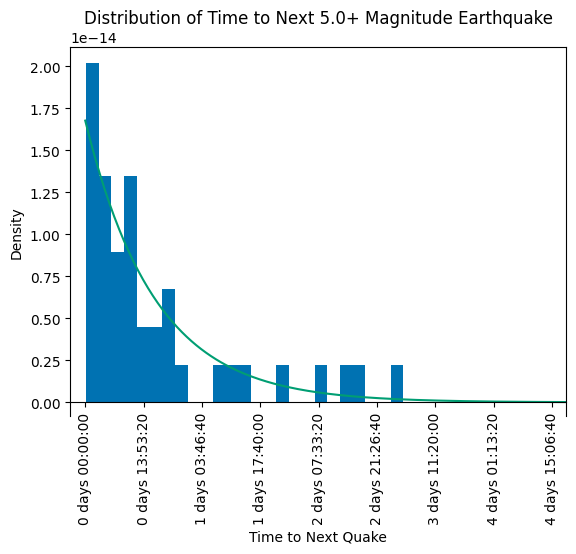

In [7]:
# Plotting the observed data
df_mag5["intertime"].hist(density=True, bins=25, grid=False)
# Plotting the theoretical distribution
Exponential(rate=1/beta).plot()

# Cosmetic stuff
ax = plt.gca()
plt.ylabel(ylabel="Density")
plt.xlabel(xlabel="Time to Next Quake")
plt.title(label="Distribution of Time to Next 5.0+ Magnitude Earthquake")
xticks = [str(pd.Timedelta(i)) for i in ax.get_xticks()]
ax.set_xticklabels(xticks)
plt.xticks(rotation=90)
xlims = ax.get_xlim()
plt.show()

## Poisson Distribution

In [8]:
# Get frequency of appropriate quakes by date
# df_counts = df_mag5["date"]
# df_counts = df_counts.value_counts()
# df_counts = df_counts.to_frame()
# df_counts = df_counts.reset_index()
# df_counts = df_counts.rename(columns={ "date": "freq", "index": "date"})
# df_counts = df_counts.sort_values(by="date", ignore_index=True)

# However, the df_counts we just generated doesn't contain days with 0 quakes.
# We need to fix this by generating rows for dates with 0 quakes.
# First, let's find the start and end dates.
# start_date = df_counts['index'].min()
# end_date = df_counts['index'].max()

# Change the datatype of existing date data to string (for better merging)
# df_counts['index'] = df_counts['index'].astype(str)
# Here we generate a dataframe with all dates
# all_dates = pd.DataFrame(pd.date_range(start_date, end_date - pd.Timedelta(days = 1), freq='d')).rename(columns={0: 'index'}).astype(str)
# Here we merge the df_counts with the table with all dates
# Then we fill in 0s for dates with no quakes
# df_counts = pd.merge(how='left', left=all_dates, right=df_counts, on='index').fillna(0)
# df_counts['date'] = df_counts['date'].astype(int)

# df_counts

In [9]:
# This makes it so our histogram bar centers line up with the dots on the theoretical distribution
# bin_edges=[i+0.5 for i in list(range(min(df_counts["date"])-1, max(df_counts["date"])+1, 1))]

# This is the number of days in our timeframe
# t=1
# This is our Poisson parameter mu
# mu=lambd*t

# Plotting the observed data
# df_counts["date"].hist(density=True, bins=bin_edges, rwidth=0.3, grid=False)
# Plotting the theoretical distribution
# Poisson(mu).plot()

# Cosmetic stuff
# plt.ylabel(ylabel="Density")
# plt.xlabel(xlabel="# of Quakes on Given Day")
# plt.title(label="Distribution of # of 5.0+ Magnitude Earthquakes on a Given Day")
# plt.xlim((0,max(df_counts["date"])+1))
# plt.show()